# CFGDEGREE - AUTUMN 2022

The project was worked on by Ingrid Ionita,  Hiu Ching (Clarissa) Lo, Michelle Obonyano and Ayomide Olarewaju.

## DATA CLEANING

### 1. IMPORTING LIBRARIES

In [2]:
# Importing all the necessary libraries.

import pandas as pd 
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from functools import reduce

### 2. IMPORTING DATASETS

Once we imported all the libraries, we need to bring together the datasets that we will use. There are three: accidents, casualties and vehicles datasets.

In [3]:
DFA= pd.read_csv('RAW - Accident Road Casualty Statistics - 2021.csv', dtype={"variable_ID":int})

/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_6511/701242018.py:1: DtypeWarning: Columns (0,2,35) have mixed types. Specify dtype option on import or set low_memory=False.
  DFA= pd.read_csv('RAW - Accident Road Casualty Statistics - 2021.csv', dtype={"variable_ID":int})


In [4]:
DFA

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2021010000000.0,2021,10287148,521508.0,193079.0,-0.246102,51.623425,1,3,3,...,0,4,7,4,1,0,1,1,2,E01000263
1,2021010000000.0,2021,10287149,535379.0,180783.0,-0.050574,51.509767,1,2,2,...,5,4,1,1,0,0,1,1,2,E01004303
2,2021010000000.0,2021,10287151,529701.0,170398.0,-0.136152,51.417769,1,2,2,...,5,4,1,1,0,0,1,1,2,E01003146
3,2021010000000.0,2021,10287155,525312.0,178385.0,-0.196411,51.490536,1,1,1,...,4,4,1,1,0,0,1,1,2,E01002847
4,2021010000000.0,2021,10287157,512144.0,171526.0,-0.388169,51.431649,1,3,4,...,0,4,1,1,0,0,1,1,2,E01002608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101082,2021990000000.0,2021,991196247,325546.0,674548.0,-3.194076,55.958152,99,3,2,...,0,1,1,1,0,0,1,1,-1,-1
101083,2021990000000.0,2021,991196607,271195.0,558271.0,-4.010304,54.902512,99,3,2,...,0,6,1,1,0,0,2,1,-1,-1
101084,2021990000000.0,2021,991197944,357297.0,860768.0,-2.716825,57.634805,99,3,1,...,0,1,1,1,0,0,2,1,-1,-1
101085,2021990000000.0,2021,991200639,326936.0,675925.0,-3.172192,55.970735,99,3,1,...,5,1,9,1,0,0,1,2,-1,-1


In [5]:
DFC = pd.read_csv('RAW - Casualty Road Casualty Statistics - 2021.csv', dtype={"variable_ID":int})
DFC

/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_6511/3742891956.py:1: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  DFC = pd.read_csv('RAW - Casualty Road Casualty Statistics - 2021.csv', dtype={"variable_ID":int})


,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,2021010000000.0,2021,10287148,1,1,1,1,19,4,3,0,0,0,0,0,9,1,10,E01023551
1,2021010000000.0,2021,10287149,1,1,2,1,25,5,3,0,0,1,0,0,9,1,5,E01003955
2,2021010000000.0,2021,10287149,2,2,1,1,21,5,3,0,0,0,0,0,9,1,3,E01004202
3,2021010000000.0,2021,10287149,2,3,2,1,17,4,2,0,0,1,0,0,9,1,2,E01004295
4,2021010000000.0,2021,10287151,1,1,1,1,27,6,3,0,0,0,0,0,9,1,2,E01002056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128204,2.02199E+12,2021,991196607,1,1,1,1,38,7,3,0,0,0,0,0,9,2,5,-1
128205,2.02199E+12,2021,991196607,2,2,1,1,61,9,3,0,0,0,0,0,9,2,9,-1
128206,2.02199E+12,2021,991197944,1,1,2,2,11,3,3,0,0,2,0,0,9,3,5,-1
128207,2.02199E+12,2021,991200639,1,1,3,2,34,6,3,1,3,0,0,0,0,1,1,-1


In [6]:
DFV = pd.read_csv('RAW - Vehicle Road Casualty Data - 2021.csv', dtype={"variable_ID":int})  
DFV

/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_6511/884594713.py:1: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  DFV = pd.read_csv('RAW - Vehicle Road Casualty Data - 2021.csv', dtype={"variable_ID":int})


,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
0,2021010000000.0,2021,10287148,1,9,0,17,1,5,0,...,1,19,4,999,1,3,VOLKSWAGEN GOLF,10,1,E01023551
1,2021010000000.0,2021,10287148,2,9,0,2,0,0,0,...,3,-1,-1,1499,1,2,BMW 1 SERIES,-1,-1,-1
2,2021010000000.0,2021,10287148,3,9,0,2,0,0,0,...,3,-1,-1,-1,3,1,SMART FORTWO,-1,-1,-1
3,2021010000000.0,2021,10287149,1,9,0,18,3,7,0,...,1,32,6,2967,2,11,AUDI Q7,-1,-1,-1
4,2021010000000.0,2021,10287149,2,9,0,18,5,1,0,...,1,21,5,1598,1,11,VAUXHALL ASTRA,3,1,E01004202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186438,2.02199E+12,2021,991196607,2,9,0,18,1,5,0,...,1,61,9,-1,-1,-1,-1,9,2,-1
186439,2.02199E+12,2021,991197944,1,9,0,18,3,7,0,...,2,51,8,-1,-1,-1,-1,5,3,-1
186440,2.02199E+12,2021,991200639,1,9,0,18,4,8,0,...,2,24,5,-1,-1,-1,-1,4,1,-1
186441,2.02199E+12,2021,991201030,1,9,0,18,2,6,0,...,1,28,6,-1,-1,-1,-1,5,2,-1


### 3. MERGING DATASETS

Once we have all the datasets in their own variables, they are ready to be merged on the accident index.

In [ ]:
# This imports the data into a dataframe, then merges all three.

frames = [DFA, DFC, DFV]

# This neatly combines the three dataframes into one dataframe.

df = reduce(lambda left, right:pd.merge(left, right, on='accident_index'), frames)      
            
# Checking the data sample and its shape.

print(df.shape)
print(DFA.shape)
print(DFV.shape)
print(DFV.shape)
df.head()

(155457, 81)
(101087, 36)
(186443, 28)
(186443, 28)


,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
0,2021010287148,2021,10287148,521508.0,193079.0,-0.246102,51.623425,1,3,3,...,1,19,4,999,1,3,VOLKSWAGEN GOLF,10,1,E01023551
1,2021010287148,2021,10287148,521508.0,193079.0,-0.246102,51.623425,1,3,3,...,3,-1,-1,1499,1,2,BMW 1 SERIES,-1,-1,-1
2,2021010287148,2021,10287148,521508.0,193079.0,-0.246102,51.623425,1,3,3,...,3,-1,-1,-1,3,1,SMART FORTWO,-1,-1,-1
3,2021010287149,2021,10287149,535379.0,180783.0,-0.050574,51.509767,1,2,2,...,1,32,6,2967,2,11,AUDI Q7,-1,-1,-1
4,2021010287149,2021,10287149,535379.0,180783.0,-0.050574,51.509767,1,2,2,...,1,21,5,1598,1,11,VAUXHALL ASTRA,3,1,E01004202


We now have our merged dataset in one variable. We will check it by using .info() and .describe() to learn a little more about it.

In [ ]:
df.info()

In [ ]:
df.describe()

### 4. IDENTIFYING MISSING VALUES

In [ ]:
# Checking how many NaN values each column contains.

missing_val= df.isnull().sum().sort_values(ascending=False)
percent_missing = ((missing_val/df.isnull().count())*100).sort_values(ascending=False)
missing_df = pd.concat([missing_val,percent_missing], axis=1, keys=['Total', '%'],sort=False)
missing_df[missing_df['Total']>=1]

,Total,%
location_easting_osgr,39,0.025087
location_northing_osgr,39,0.025087
longitude,39,0.025087
latitude,39,0.025087


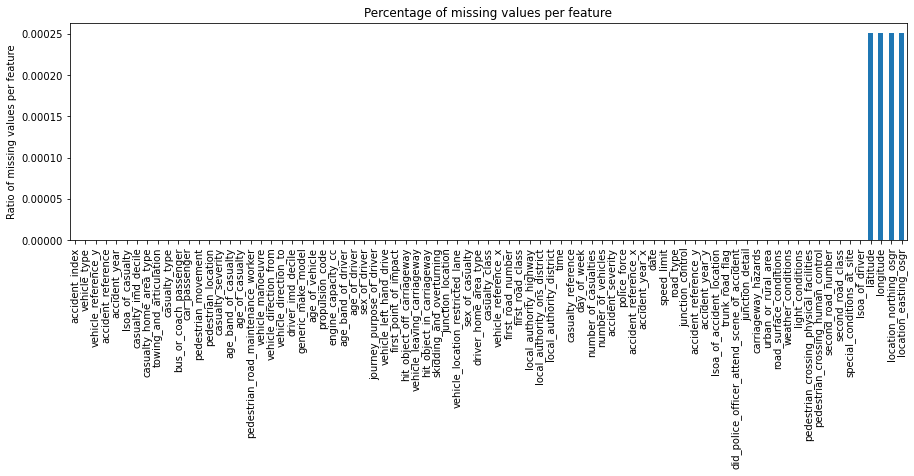

In [ ]:
# Visualizing the columns with missing values.

df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

In [ ]:
# Dropping the columns with missing data, as it is small and negligible.

df=df.dropna()

### 5. REMOVING DULPICATES

In [ ]:
n_duplicates =df.drop(labels=["accident_index"], axis=1).duplicated().sum()
print(f"You might have {n_duplicates} duplicates in your database.")

You might have 0 duplicates in your database.


### 6. HANDLING NEGATIVE (-1) VALUES

Through the available codes provided by the UK government, -1 values represent missing data.

In [ ]:
df.describe()

,accident_year_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,...,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
count,155418.0,155418.000000,1.554180e+05,155418.000000,155418.000000,155418.000000,155418.000000,155418.000000,155418.000000,155418.000000,...,155418.000000,155418.000000,155418.000000,155418.000000,155418.000000,155418.000000,155418.000000,155418.000000,155418.000000,155418.000000
mean,2021.0,449469.871379,3.017535e+05,-1.279797,52.605357,22.429931,2.756341,2.196921,1.731807,4.150806,...,1.435342,4.741729,1.483271,34.768914,5.843969,1218.502201,0.895533,5.383128,3.642654,0.854656
std,0.0,80584.931165,1.228231e+05,1.181763,1.106789,20.920927,0.471355,0.900845,1.218656,1.959448,...,1.801132,1.920703,0.692908,20.497712,3.112279,1443.748107,1.777900,6.304427,3.388386,1.072885
min,2021.0,68887.000000,7.016300e+04,-7.455655,50.530387,1.000000,1.000000,1.000000,1.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2021.0,395347.500000,1.861160e+05,-2.070187,51.560591,6.000000,3.000000,2.000000,1.000000,2.000000,...,1.000000,5.000000,1.000000,23.000000,5.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
50%,2021.0,438923.000000,2.892840e+05,-1.414197,52.497084,17.000000,3.000000,2.000000,1.000000,4.000000,...,1.000000,6.000000,1.000000,34.000000,6.000000,1299.000000,1.000000,4.000000,3.000000,1.000000
75%,2021.0,524208.000000,3.916280e+05,-0.204809,53.419270,34.000000,3.000000,2.000000,2.000000,6.000000,...,1.000000,6.000000,2.000000,49.000000,8.000000,1798.000000,2.000000,10.000000,6.000000,1.000000
max,2021.0,655140.000000,1.179892e+06,1.755955,60.500008,99.000000,3.000000,11.000000,22.000000,7.000000,...,9.000000,6.000000,3.000000,101.000000,11.000000,29980.000000,12.000000,91.000000,10.000000,3.000000


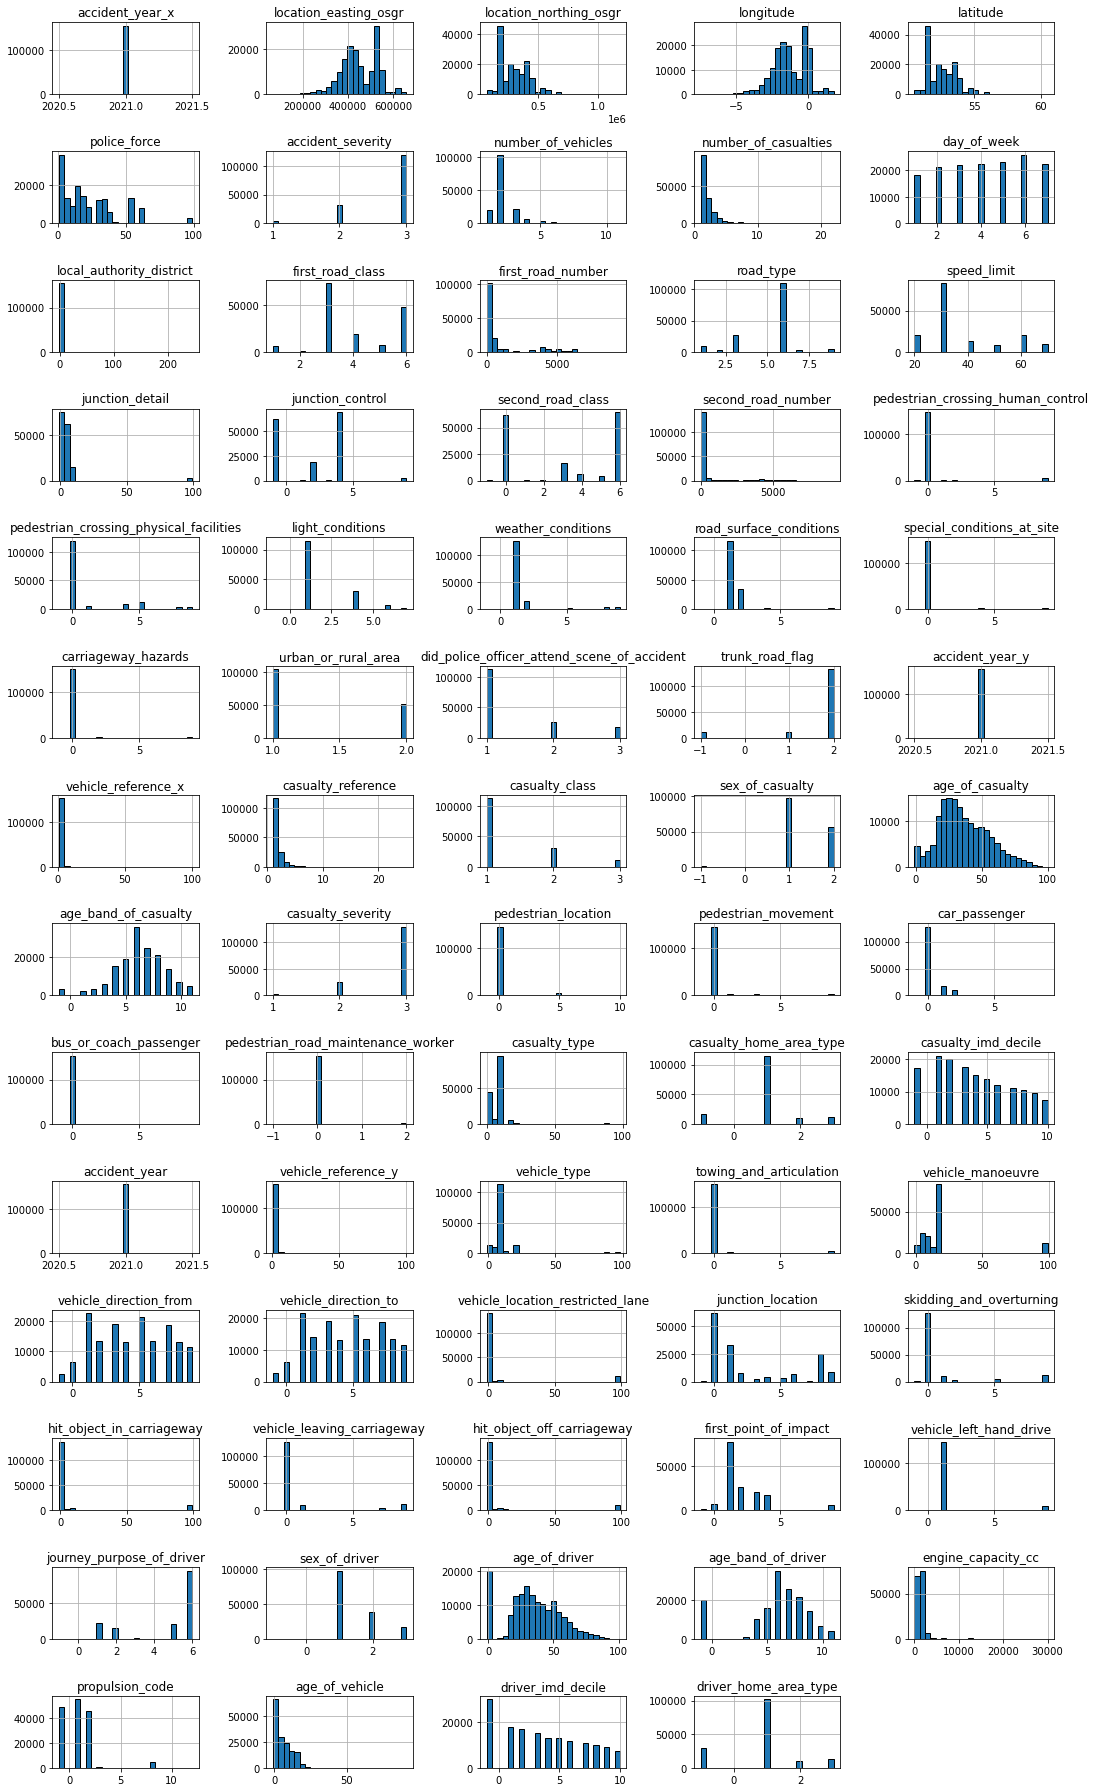

In [ ]:
# Visual display of the entire dataset by columns. From here we can see which column has -1 values and requires cleaning.

df.hist(bins=25, figsize=(15,25), layout=(-1,5), edgecolor= 'black')
plt.tight_layout();

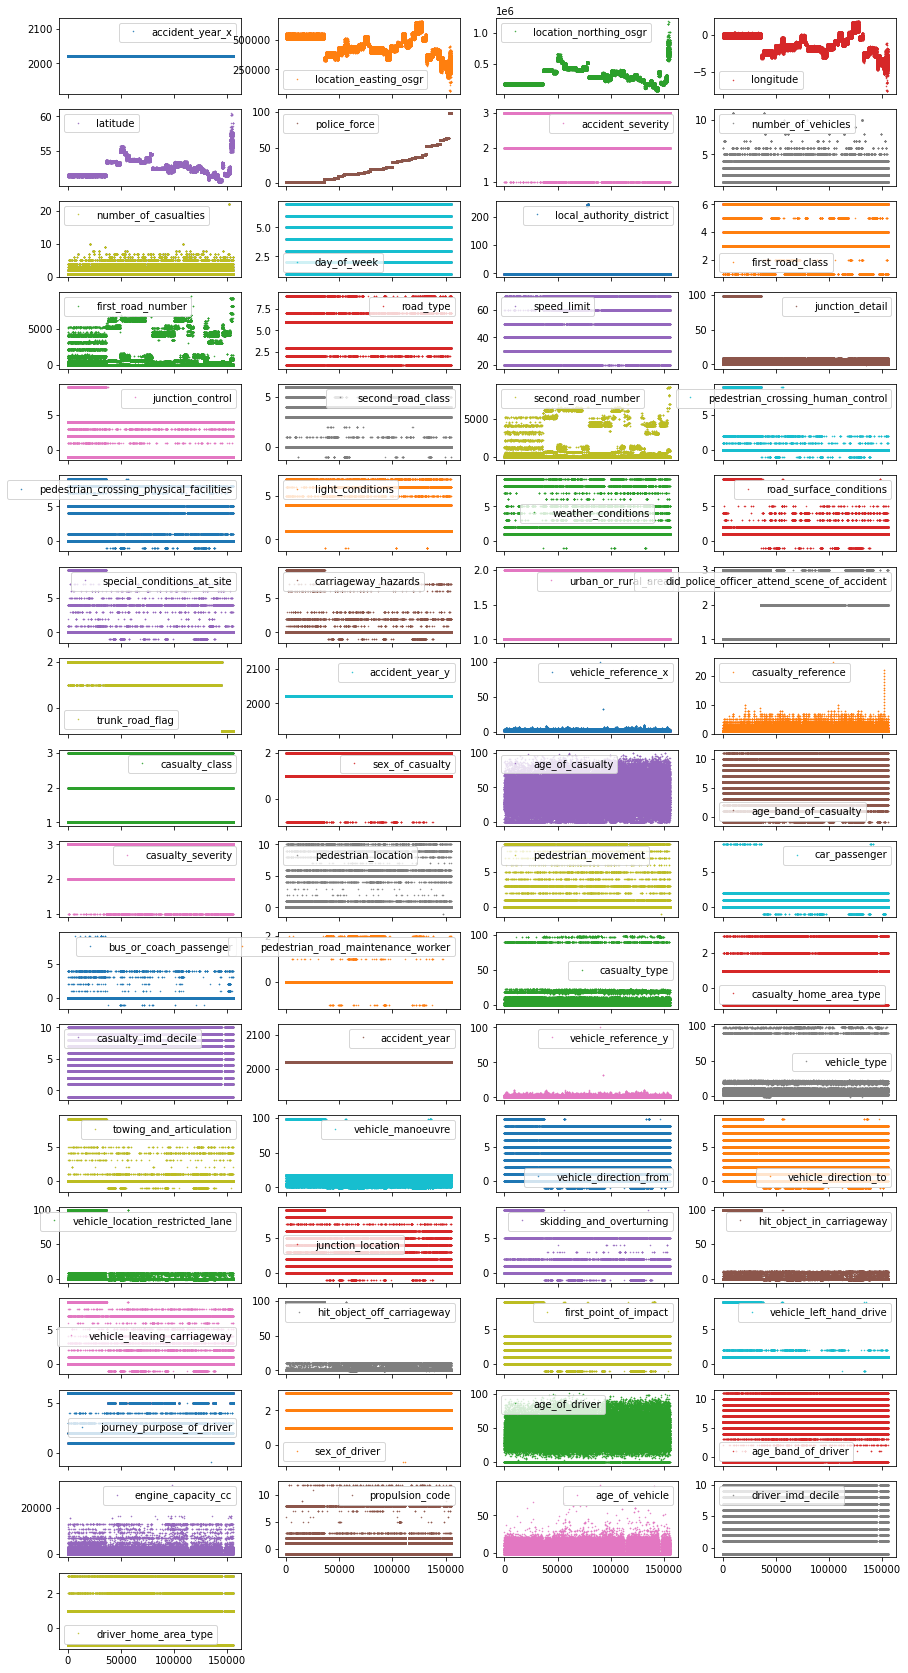

In [ ]:
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
        figsize=(15, 30), markersize=1);

Now let's count how many -1 values there are for each column that requires the cleaning.

#### A: Light conditions

Label codes: 
- 1: Daylight 
- 4: Darkness - lights lit 
- 5: Darkness - lights unlit 
- 6: Darkness - no lighting 
- 7: Darkness - lighting unknown

In [ ]:
df.light_conditions.value_counts()

 1    114911
 4     29774
 6      6908
 7      2789
 5      1005
-1        31
Name: light_conditions, dtype: int64

In [ ]:
# We have only 31 missing value and this will be replaced by the mode 1.

df['light_conditions'] = df['light_conditions'].replace(-1, 1)

#### B: Weather conditions

Label codes: 
- 1: Fine no high winds 
- 2: Raining no high winds 
- 3: Snowing no high winds 
- 4: Fine + high winds 
- 5: Raining + high winds 
- 6: Snowing + high winds 
- 7: Fog or mist 
- 8: Other 
- 9: Unknown

In [ ]:
df.weather_conditions.value_counts()

 1    126047
 2     15615
 8      4945
 9      4094
 5      1451
 4      1302
 3      1112
 7       610
 6       204
-1        38
Name: weather_conditions, dtype: int64

In [ ]:
# These missing values will be added to mode 9.
df['weather_conditions'] = df['weather_conditions'].replace(-1, 9)

### C: Road surface conditions

Label codes: 

- 1: Dry 
- 2: Wet/Damp 
- 3: Snow 
- 4: Frost/Ice 
- 5: Flood over 3cm. deep 
- 6: Oil/Diesel 
- 7: Mud 
- 9: Unknown

In [ ]:
df.road_surface_conditions.value_counts()

 1    116303
 2     34060
 4      1785
 9      1378
 3       934
-1       763
 5       195
Name: road_surface_conditions, dtype: int64

In [ ]:
# Missing value is replaced with mode 9 as this is larger than the last two occurrences.

df['road_surface_conditions'] = df['road_surface_conditions'].replace(-1, 9)

### D: Special conditions at the site of the accident

Label codes: 
- 0: None 
- 1: Auto traffic signal - out 
- 2: Auto signal part defective 
- 3: Road sign or marking defective or obscured 
- 4: Roadworks 5: Road surface defective 
- 6: Oil or diesel 
- 7: Mud 
- 9: Unknown


In [ ]:
df.special_conditions_at_site.value_counts()

 0    148030
 4      2709
 9      2447
-1       599
 1       553
 5       293
 3       258
 7       257
 6       175
 2        97
Name: special_conditions_at_site, dtype: int64

In [ ]:
# Missing value is replaced with mode 9 as this is larger enough to influence the data.

df['special_conditions_at_site'] = df['special_conditions_at_site'].replace(-1, 9)

### E: Carriageway hazards

Label code:
- 0: None 
- 1: Vehicle load on road 
- 2: Other object on road 
- 3: Previous accident 
- 4: Dog on road 
- 5: Other animal on road 
- 6: Pedestrian in carriageway - not injured 
- 7: Any animal in carriageway (except ridden horse) 
- 9: unknown

In [ ]:
df.carriageway_hazards.value_counts()

 0    149697
 9      2043
 2      1614
-1       591
 7       428
 3       421
 1       399
 6       225
Name: carriageway_hazards, dtype: int64

In [ ]:
# Missing value is replaced with existing mode 9 as this is large enough to influence the data.

df['carriageway_hazards'] = df['carriageway_hazards'].replace(-1, 9)

### F: Vehicle type


In [ ]:
df.vehicle_type.value_counts()

 9     110697
 1      11688
 19     10174
 3       6025
 5       2923
 8       2481
 21      2321
 11      2310
 90      1829
 4       1276
 2        868
 98       751
 20       618
 97       385
 17       325
 10       238
 22       222
 23       164
 16        55
-1         43
 18        25
Name: vehicle_type, dtype: int64

In [ ]:
# Missing value is replaced with code 99 as this is larger enough to influence the data.

df['vehicle_type'] = df['vehicle_type'].replace(-1, 99)

### G: Junction detail 

Label code

- 0: Not at junction or within 20 metres
- 1: Roundabout
- 2: Mini-roundabout
- 3: T or staggered junction
- 5: Slip road
- 6: Crossroads
- 7: More than 4 arms (not roundabout)
- 8: Private drive or entrance
- 9: Other junction
- 99: Unknown

In [ ]:
df.junction_detail.value_counts()

 0     62000
 3     43078
 6     16764
 1     11424
 9      8831
 8      3571
 99     2927
 7      2449
 5      2325
 2      2047
-1         2
Name: junction_detail, dtype: int64

In [ ]:
# The  missing value (-1) has 2 occurences, hence it will be added to the 99 code.
df['junction_detail'] = df['junction_detail'].replace(-1, 99)

### H: Junction control

Label codes:
- 0: Not at junction or within 20 metres 
- 1: Authorised person 
- 2: Auto traffic signal 
- 3: Stop sign 
- 4: Give way or uncontrolled 
- 9: unknown

In [ ]:
df.junction_control.value_counts()

 4    69720
-1    62687
 2    19011
 9     2591
 3      981
 1      428
Name: junction_control, dtype: int64

In [ ]:
# The missing value (-1) has 62,687 occurences, which is the second largest. 
# It is be added to the existing unknown data in order not to skew the dataset -1.
df['junction_control'] = df['junction_control'].replace(-1, 9)

### I: Journey purpose of driver

Label code:
- 1: Journey as part of work 
- 2: Commuting to/from work 
- 3: Taking pupil to/from school 
- 4: Pupil riding to/from school 
- 5: Other 
- 6: Not known.

In [ ]:
df.journey_purpose_of_driver.value_counts()

 6    95137
 1    21756
 5    21570
 2    14807
 3     1679
 4      468
-1        1
Name: journey_purpose_of_driver, dtype: int64

In [ ]:
# Missing values will be added to the not known group.
df['journey_purpose_of_driver'] = df['journey_purpose_of_driver'].replace(-1, 6)

### J: Age band of driver

Label code:
- 1: 0 - 5
- 2: 6 - 10
- 3: 11 - 15
- 4: 16 - 20
- 5: 21 - 25
- 6: 26 - 35
- 7: 36 - 45
- 8: 46 - 55
- 9: 56 - 65
- 10: 66 - 75
- 11: Over 75
- 12: unknown
    


In [ ]:
df.age_band_of_driver.value_counts()

 6     35156
 7     25799
 8     21463
-1     20183
 5     16124
 9     14316
 4     10236
 10     6596
 11     4064
 3      1200
 2       255
 1        26
Name: age_band_of_driver, dtype: int64

In [ ]:
# Missing value is replaced with code 12.
df['age_band_of_driver'] = df['age_band_of_driver'].replace(-1, 12)

### K: Driver home area type

Label code:
- 1: Urban area
- 2: Small town
- 3: Rural
- 0: Unknown
    

In [ ]:
df.driver_home_area_type.value_counts()

 1    102048
-1     29724
 3     13213
 2     10433
Name: driver_home_area_type, dtype: int64

In [ ]:
# Replacing the missing value with 0 because the missing value has the second highest count.

df['driver_home_area_type'] = df['driver_home_area_type'].replace(-1, 0)

### L: Vehicle manouvre

Label code: 
- 1:Reversing
- 2: Parked
- 3: Waiting to go - held up
- 4: Slowing or stopping
- 5: Moving off
- 6: U-turn
- 7: Turning left
- 8: Waiting to turn left
- 9: Turning right
- 10: Waiting to turn right
- 11:	Changing lane to left
- 12:	Changing lane to right
- 13:	Overtaking moving vehicle - offside
- 14:	Overtaking static vehicle - offside
- 15:	Overtaking - nearside
- 16:	Going ahead left-hand bend
- 17:	Going ahead right-hand bend
- 18:	Going ahead other
- 99:	Unknown
    


In [ ]:
df.vehicle_manoeuvre.value_counts()

 18    73038
 9     12965
 99    11437
 4      9417
 3      6854
 5      6820
 2      6559
 17     4741
 7      4733
 16     4199
 13     3003
 10     1977
 1      1727
 14     1426
-1      1321
 12     1286
 11     1167
 6      1063
 15      992
 8       693
Name: vehicle_manoeuvre, dtype: int64

In [ ]:
# Missing value merged with existing and label 99 (unknown) as this is  large enough to influence the data.

df['vehicle_manoeuvre'] = df['vehicle_manoeuvre'].replace(-1, 99)

### M: First point of impact

Label code:
- 0: Did not impact 
- 1: Front 
- 2: Back 
- 3: Offside 
- 4: Nearside 
- 9: Unknown



In [ ]:
df.first_point_of_impact.value_counts()

 1    77127
 2    26149
 3    20247
 4    17313
 0     7425
 9     5469
-1     1688
Name: first_point_of_impact, dtype: int64

In [ ]:
# Missing value is replaced with code 9 and label unknown as this is large enough to influence the data.

df['first_point_of_impact'] = df['first_point_of_impact'].replace(-1, 9)

### N: Engine capacity

In [ ]:
df.engine_capacity_cc.value_counts()

-1        49910
 1598      8081
 1968      5344
 1995      4844
 998       4150
          ...  
 2697         1
 1342         1
 15000        1
 950          1
 2766         1
Name: engine_capacity_cc, Length: 860, dtype: int64

In [ ]:
# Replacing the missing value with 0 because missing value has the highest count.

df['engine_capacity_cc'] = df['engine_capacity_cc'].replace(-1, 0)

We can now categorise the engine types.

0    0
dtype: int64


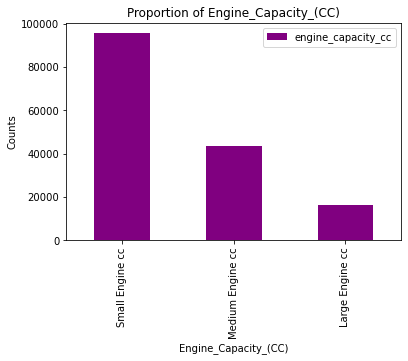

In [ ]:
#finding the mode of the column
a=df['engine_capacity_cc'].mode()

#replacing the missing value with 0 because missing value has the highest count
df['engine_capacity_cc'] = df['engine_capacity_cc'].replace(-1, 0)

#printing mode and value counts
print(a)
#reclassifying the engine capacity

def enginecap(eng_cc):
    if eng_cc <=1500:
        return "Small Engine cc"
    if eng_cc >1500 and eng_cc <=2000:
        return "Medium Engine cc"
    if eng_cc >2000:
        return "Large Engine cc"


df['engine_capacity_cc'] = df['engine_capacity_cc'].apply(enginecap)



#visualizing the value counts
df['engine_capacity_cc'].value_counts().plot(kind='bar', color= 'purple')
plt.title('Proportion of Engine_Capacity_(CC)')
plt.xlabel('Engine_Capacity_(CC)')

plt.ylabel('Counts')

plt.legend();

### O: Propulsion code

Label code:
- 1: Petrol 
- 2: Heavy oil 
- 3: Electric 
- 4: Steam 
- 5: Gas 
- 6: Petrol/Gas (LPG) 
- 7: Gas/Bi-fuel 
- 8: Hybrid electric 
- 9: Gas Diesel 
- 10: New fuel technology 
- 11: Fuel cells 
- 12: Electric diesel 
- 0: Undefined


In [ ]:
df.propulsion_code.value_counts()

 1     55217
-1     48974
 2     45508
 8      4537
 3       861
 12      178
 7        84
 5        48
 6         7
 9         3
 11        1
Name: propulsion_code, dtype: int64

In [ ]:
# Replacing the missing value with 0 because unknown is the mode and obviously it needs to stand alone as undefined.

df['propulsion_code'] = df['propulsion_code'].replace(-1, 0)

### P: Generic make model


In [ ]:
df.generic_make_model.value_counts()

-1                        51812
FORD FIESTA                4260
VOLKSWAGEN GOLF            3352
VAUXHALL CORSA             3335
VAUXHALL ASTRA             2979
                          ...  
HONDA Model Missing           2
SCANIA Model Missing          2
IVECO Model Missing           1
MERCEDES Model Missing        1
Triumph TIGER                 1
Name: generic_make_model, Length: 662, dtype: int64

In [ ]:
# Missing value to be replaced by 0 and labelled unknown.

df['generic_make_model'] = df['generic_make_model'].replace(-1, 0)

### Q: Age of driver

In [ ]:
df.age_of_driver.value_counts()

-1      20183
 30      5570
 31      3472
 25      3445
 29      3360
        ...  
 3          5
 98         4
 100        3
 96         3
 101        2
Name: age_of_driver, Length: 100, dtype: int64

In [ ]:
df['age_of_driver'].unique()

array([ 19,  -1,  32,  21,  27,  37,  42,  25,  30,  53,  41,  23,  51,
        68,  70,  45,  46,  29,  18,  48,  14,  35,  47,  40,  39,  28,
        34,  24,  38,  57,  44,  74,  36,  26,  71,  58,  33,  55,  66,
        20,  22,  31,  56,  54,  59,  50,  62,  49,  69,  75,  52,  43,
        73,  79,  67,  13,  17,  84,  16,  64,  83,  60,  61,  93,  10,
        80,  65,  72,  76,  63,  78,  15,  11,  82,  85,  77,  88,  81,
        86,  12,  87,  89,  92,   8,   9,   7,   3,  90,   5,   4,  91,
        94,   6,  95,  98, 100,  99,  97, 101,  96], dtype=int64)

In [ ]:
median =df['age_of_driver'].median()


In [ ]:
median

34.0

In [ ]:
#replacing the drivers age with the median
df['age_of_driver']=df['age_of_driver'].replace(-1, 34 )

In [ ]:
df.info()

## 7: DROPPING COLUMNS

We will also need to reduce the number of columns for our dataset, because there are too many and we will not use all of them.

In [ ]:
df = df.drop(columns=['accident_year','towing_and_articulation', 'vehicle_manoeuvre', 'vehicle_direction_from', 'vehicle_direction_to', 
                        'vehicle_location_restricted_lane', 'skidding_and_overturning', 'hit_object_in_carriageway', 'vehicle_leaving_carriageway', 
                        'hit_object_off_carriageway', 'first_point_of_impact', 'vehicle_left_hand_drive', 'driver_imd_decile', 'driver_home_area_type', 'lsoa_of_driver'])
df

In [ ]:
# Columns related to the casualty data.

df = df.drop(columns=['pedestrian_location', 'pedestrian_movement', 'car_passenger', 'bus_or_coach_passenger',
                        'pedestrian_road_maintenance_worker','casualty_type','casualty_imd_decile', 'casualty_home_area_type', 'accident_year_x', 'accident_year_y'])
df

In [ ]:
# Columns related to the accident data.

df = df.drop(columns=['local_authority_district', 'local_authority_highway', 'first_road_number',
'junction_control', 'second_road_class', 'second_road_number', 'pedestrian_crossing_human_control',
'pedestrian_crossing_physical_facilities', 'special_conditions_at_site', 'carriageway_hazards', 'trunk_road_flag','junction_detail', 'lsoa_of_accident_location','accident_reference_y'])

df

## 8. DROPPING ROWS

We also want to drop all rows that we do not want to have, because the information is important. For example, the gender of the casualties and the drivers is important for us to have, in order to look at the difference.

Furthermore, our dataset is very big so we needed to reduce it down to a smaller number that our computers can handle.

In [ ]:
dv = [-1, 9]
df = df[df.sex_of_casualty.isin(dv) ==  False]

In [ ]:
dv = [-1]

df = df[df.age_band_of_casualty.isin(dv) == False]

In [ ]:
dv = [91, 92, 93, 94, 95, 96, 97, 98, 99]
# These categories were discontinued in 2019, so we do not need them in our analysis if they show up.

df = df[df.police_force.isin(dv) == False]

In [ ]:
dv = [-1, 3]
df = df[df.sex_of_driver.isin(dv) ==  False]

In [ ]:
dv = [-1]
# -1 is unknown, 9 is unknown (self-reported)

DF = DF[DF.road_surface_conditions.isin(dv) == False]

In [ ]:
dv = [-1, 99]
DF = DF[DF.speed_limit.isin(dv) == False]

In [ ]:
dv = [-1]
DF = DF[DF.weather_conditions.isin(dv) == False]

In [ ]:
DF = DF[DF.first_road_class !=  6]

DF = DF[DF.light_conditions !=  -1]

DF = DF[DF.urban_or_rural_area !=  -1]

In [ ]:
DF = DF[DF.age_of_casualty !=  -1]

DF = DF[DF.age_band_of_casualty !=  -1]

In [ ]:
dv = [-1]
DF = DF[DF.junction_location.isin(dv) ==  False]

In [ ]:
dv = [-1]
# 90, 99, 103, 104, 105, 106, 108, 109, 110, 113
DF = DF[DF.vehicle_type.isin(dv) ==  False]

In [ ]:
dv = [-1]
DF = DF[DF.journey_purpose_of_driver.isin(dv) ==  False]

In [ ]:
DF = DF[DF.age_of_driver !=  -1]

DF = DF[DF.engine_capacity_cc !=  -1]

DF = DF[DF.generic_make_model !=  -1]

DF = DF[DF.propulsion_code !=  0]

## 9. SAVING THE DATA

In [ ]:
# Cleaned data and saved in a new csv file.

df.to_csv('cleaned_data.csv',index=False)

## 10. UNUSED CODE

The following section has been commented out because we decided not to use it anymore, but we still wanted to show our work.

In [ ]:
# # Sex of driver

# def driver_sex(gender):
#     if gender == 1:
#         return "Male"
#     if gender == 2:
#         return "Female"
#     else:
#         return "Unknown"


# df['sex_of_driver'] = df['sex_of_driver'].apply(driver_sex)

In [ ]:
# # Casualty class

# def cas_class(classes):
#     if classes == 1:
#         return "Driver or rider"
#     if classes == 2:
#         return "Passenger"
#     if classes == 3:
#         return "Pedestrian"


# df['casualty_class'] = df['casualty_class'].apply(cas_class)

In [ ]:
# # Sex of casualty

# def casualty_sex(gender):
#     if gender == 1:
#         return "Male"
#     if gender == 2:
#         return "Female"
#     else:
#         return "Unknown"


# df['sex_of_casualty'] = df['sex_of_casualty'].apply(casualty_sex)

In [ ]:
# # Casualty severity

# def cas_severity(severity):
#     if severity == 1:
#         return "Fatal"
#     if severity == 2:
#         return "Serious"
#     if severity == 3:
#         return "Slight"


# df['casualty_severity'] = df['casualty_severity'].apply(cas_severity)

In [ ]:
# # Accident severity

# def cas_class(classes):
#     if classes == 1:
#         return "Driver or rider"
#     if classes == 2:
#         return "Passenger"
#     if classes == 3:
#         return "Pedestrian"


# df['casualty_class'] = df['casualty_class'].apply(cas_class)

In [ ]:
# # Day of the week

# def week_day(day):
#     if day == 1:
#         return "Sun"
#     if day == 2:
#         return "Mon"
#     if day == 3:
#         return "Tue"
#     if day == 4:
#         return "Wed"
#     if day == 5:
#         return "Thu"
#     if day == 6:
#         return "Fri"
#     if day == 7:
#         return "Sat"
#     else:
#         return "Unknown"


# df['day_of_week'] = df['day_of_week'].apply(week_day)

In [ ]:
# # Light conditions

# def light_condition(light):
#     if light == 1:
#         return "Daylight"
#     if light == 4:
#         return "Darkness, lights lit"
#     if light == 5:
#         return "Darkness, lights unlit"
#     if light == 6:
#         return "Darkness, no lighting"
#     if light == 7:
#         return "Darkness, lighting unknown"
#     else:
#         return "Unknown"


# df['light_conditions'] = df['light_conditions'].apply(light_condition)

In [ ]:
# # Weather conditions

# def weather_condition(weather):
#     if weather == 1:
#         return "Fine, no high winds"
#     if weather == 2:
#         return "Raining, no high winds"
#     if weather == 3:
#         return "Snowing, no high winds"
#     if weather == 4:
#         return "Fine, high winds"
#     if weather == 5:
#         return "Raining, high winds"
#     if weather == 6:
#         return "Snowing, high winds"
#     if weather == 7:
#         return "Fog/Mist"
#     else:
#         return "Unknown"


# df['weather_conditions'] = df['weather_conditions'].apply(weather_condition)

In [ ]:
# # Road surface conditions
# def surface_condition(surface):
#     if surface == 1:
#         return "Dry"
#     if surface == 2:
#         return "Wet/Damp"
#     if surface == 3:
#         return "Snow"
#     if surface == 4:
#         return "Frost/Ice"
#     if surface == 5:
#         return "Flood (3cm >)"
#     else:
#         return "Unknown"


# df['road_surface_conditions'] = df['road_surface_conditions'].apply(surface_condition)

In [ ]:
# # Urban or rural area

# def urban_or_rural(type):
#     if type == 1:
#         return "Urban"
#     if type == 2:
#         return "Rural"
#     else:
#         return "Unallocated"


# df['urban_or_rural_area'] = df['urban_or_rural_area'].apply(urban_or_rural)